In [1]:
import pandas as pd
csv_file = "/Users/louis/Desktop/Ironhack/Git/lab-customer-analysis-round-3/files_for_lab/marketing_customer_analysis.csv"
file = pd.read_csv(csv_file)

In [4]:
#file head 
file.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [2]:
#file info

file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [3]:
#file describe

file.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [18]:
#library imports
from scipy.stats import uniform
import math
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [13]:
print(file.columns)

sales = file['Sales Channel']

print(sales)

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')
0             Agent
1             Agent
2             Agent
3       Call Center
4             Agent
           ...     
9129            Web
9130         Branch
9131         Branch
9132         Branch
9133    Call Center
Name: Sales Channel, Length: 9134, dtype: object


In [14]:
# plot of total number of responses 

file[file.Response !="No"]
counts = file.Response.value_counts()
print(counts)
no = [0]
yes = [1]

No     7826
Yes    1308
Name: Response, dtype: int64


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1308. , 1959.8, 2611.6, 3263.4, 3915.2, 4567. , 5218.8, 5870.6,
        6522.4, 7174.2, 7826. ]),
 <a list of 10 Patch objects>)

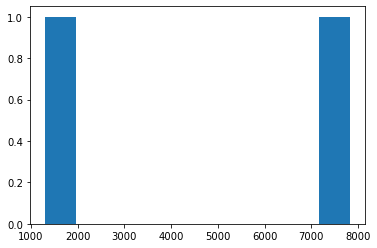

In [22]:
plt.hist(counts)

In [15]:
sales.value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

(array([3477.,    0.,    0., 1765.,    0.,    0., 1325.,    0.,    0.,
        2567.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

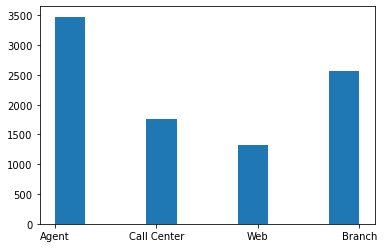

In [21]:
#plot total number of responses with Sales channel

plt.hist(file['Sales Channel'])

(array([2.450e+03, 4.735e+03, 1.302e+03, 3.860e+02, 1.830e+02, 3.600e+01,
        2.300e+01, 1.300e+01, 4.000e+00, 2.000e+00]),
 array([9.90070000e-02, 2.89413074e+02, 5.78727141e+02, 8.68041208e+02,
        1.15735528e+03, 1.44666934e+03, 1.73598341e+03, 2.02529748e+03,
        2.31461154e+03, 2.60392561e+03, 2.89323968e+03]),
 <a list of 10 Patch objects>)

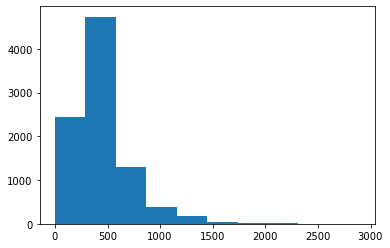

In [23]:
#Plot total Claim Amount

plt.hist(file['Total Claim Amount'])

(array([2317.,  522., 1381.,  893.,  749.,  791.,  759.,  698.,  545.,
         479.]),
 array([    0. ,  9998.1, 19996.2, 29994.3, 39992.4, 49990.5, 59988.6,
        69986.7, 79984.8, 89982.9, 99981. ]),
 <a list of 10 Patch objects>)

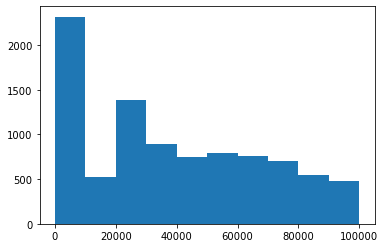

In [24]:
#Plot by Income

plt.hist(file['Income'])